In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# définition des fonctions k1, l1, k2, l2 et g
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

In [4]:
# Aire d'un triangle pour Loi des Aires de Kepler
def aire_triangle(a, b, c):
    """
    Calcule l'aire du triangle formé par trois points a, b, c.
    Chaque point est une liste ou un tableau [x, y].
    """
    x1, y1 = a
    x2, y2 = b
    x3, y3 = c
    aire = 0.5 * abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)) # Calcul déterminant
    return aire

# méthode d'Euler-Richardson
def fct_Euler_Richardson_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, K1, K2, L1, L2, G, M, seuil):
    """
    Implémente la méthode d'Euler-Richardson pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - K1 : fonction K1(t, x, y) définissant l'équation différentielle du/dt = K1
    - L1 : fonction L1(t, x, y) définissant l'équation différentielle dv/dt = L1
    - K2 : fonction K2(t, u, v) définissant l'équation différentielle dx/dt = K2
    - L2 : fonction L2(t, u, v) définissant l'équation différentielle dy/dt = L2

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    
    x = [x0]
    y =[y0]
    u = [x_prime0]
    v = [y_prime0]
    t = [tmin]
    
    i = 1
    while t[i-1]<tmax:
        epsilon = 0

        ku = K1(x[i-1],y[i-1], G, M)
        kv = L1(x[i-1],y[i-1], G, M)
        kx = K2(u[i-1],v[i-1])
        ky = L2(u[i-1],v[i-1])
        kpu = K1((x[i-1]+pas/2*kx),(y[i-1]+pas/2*ky), G, M)
        kpv = L1((x[i-1]+pas/2*kx),(y[i-1]+pas/2*ky), G, M)
        kpx = K2((u[i-1]+pas/2*ku),(v[i-1]+pas/2*kv))
        kpy = L2((u[i-1]+pas/2*ku),(v[i-1]+pas/2*kv))

        k = np.array([ku,kv,kx,ky])
        kp = np.array([kpu,kpv,kpx,kpy])
        for j in range(0,len(kp)):
            epsilon += (pas/2)*abs(kp[j]-k[j])    
        alpha = epsilon/seuil
        if alpha > 1:
            pas = 0.9*pas/np.sqrt(alpha)
        if alpha < 1:
            u.append(u[i-1] + kp[0]*pas)
            v.append(v[i-1] + kp[1]*pas)
            x.append(x[i-1] + kp[2]*pas)
            y.append(y[i-1] + kp[3]*pas)
            t.append(t[i-1] + pas)

            pas = 0.9*pas/np.sqrt(alpha)
            i+=1
        

        
    return x, y, t

def verifier_loi_aires(x, y, t, seuil=0.25):
    """
    Vérifie la loi des aires de Kepler en comparant l'aire des triangles successifs,
    en prenant en compte les intervalles de temps variables et la proportionnalité entre les aires et le temps.

    Arguments :
    - x, y : listes des positions en x et y de l'astre à chaque instant de temps
    - t : liste des instants de temps
    - seuil : tolérance pour l'égalité des aires

    Retourne :
    - sorted_errors : liste des erreurs les plus élevées (ordre décroissant) avec leurs instants de temps
    """
    aire_precedente = aire_triangle([0, 0], [x[0], y[0]], [x[1], y[1]])

    error_dict={}
    
    for i in range(1, len(t)-1):
        aire_courante = aire_triangle([0, 0], [x[i], y[i]], [x[i+1], y[i+1]])
        
        # Calcul des intervalles de temps
        delta_t = t[i] - t[i-1]
        if i > 1:
            delta_t_precedent = t[i-1] - t[i-2] 
        else:
            delta_t_precedent = delta_t  # Gérer le cas pour i=1
        
        # Rapport entre les intervalles de temps
        rapport_temps = abs(delta_t / delta_t_precedent)

        # Comparaison des variations d'aire


        # Enregistrer l'erreur dans le dictionnaire
        erreur = abs(aire_courante - aire_precedente*rapport_temps) / (aire_precedente*rapport_temps)
        error_dict[t[i]] = erreur
        #print(t[i], i,"|",  erreur, seuil,"|", rapport_temps, delta_t, delta_t_precedent)
        # Comparer la variation d'aire et de temps
        if erreur > seuil:
            print(f"Violation de la loi des aires à t={t[i]}")
            return False
        
        aire_precedente = aire_courante
        
     # Trier les erreurs en ordre décroissant
    sorted_errors = sorted(error_dict.items(), key=lambda x: x[1], reverse=True)

    return sorted_errors

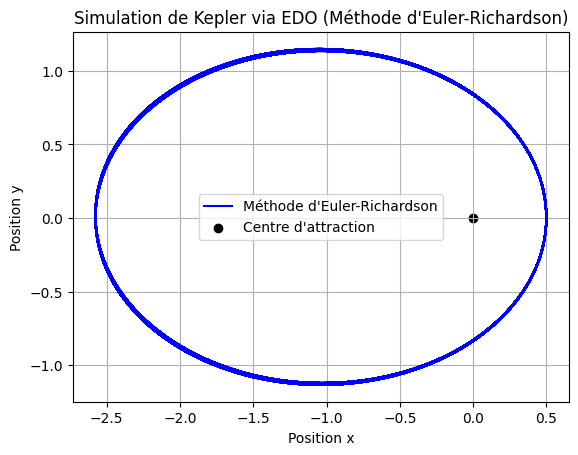

La loi des aires de Kepler est respectée.
Liste des erreurs les plus élevées (en %):
1. t = 0.00 : Erreur = 0.06815
Liste des erreurs les plus élevées (en %):
2. t = 0.00 : Erreur = 0.06714
Liste des erreurs les plus élevées (en %):
3. t = 51.51 : Erreur = 0.01140
Liste des erreurs les plus élevées (en %):
4. t = 362.54 : Erreur = 0.01133
Liste des erreurs les plus élevées (en %):
5. t = 68.69 : Erreur = 0.01132
Liste des erreurs les plus élevées (en %):
6. t = 251.86 : Erreur = 0.01131
Liste des erreurs les plus élevées (en %):
7. t = 393.07 : Erreur = 0.01129
Liste des erreurs les plus élevées (en %):
8. t = 85.86 : Erreur = 0.01129
Liste des erreurs les plus élevées (en %):
9. t = 15.26 : Erreur = 0.01129
Liste des erreurs les plus élevées (en %):
10. t = 230.87 : Erreur = 0.01127
Première erreur en dessous de 5%
3/358264. t = 51.51 : Erreur = 0.01140
La moyenne est 0.011274332056516043


In [ ]:
# paramètres et conditions initiales
from matplotlib import legend


M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 500
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)

u1 = x_prime0 + h*k1(x0,y0, G_temp, M_soleil)
v1 = y_prime0 + h*l1(x0,y0, G_temp, M_soleil)
x1 = x0 + h*k2(x_prime0,y_prime0)
y1 = y0 + h*l2(x_prime0,y_prime0)

seuil = 0.0001
# 1e-6 error max: 6.930%, premier < 5%: 3/104720
# 0.0001 error max: 6.8%, premier < 5%: 3/10474
# 0.001 error max: 7.4%, premier < 5% 3/3313
# 0.01 error max: 8.7%, premier < 5% 24/1042
# 0.018 error max: 23%, premier < 5% 64/775


# méthode d'Euler-Richardson
xEulerR, yEulerR, t = fct_Euler_Richardson_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, k1, k2, l1, l2, G_temp, M_soleil, seuil)

# Tracer les trajectoires
plt.figure()
plt.plot(xEulerR, yEulerR, label="Méthode d'Euler-Richardson", linestyle="-", color="b")
# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO (Méthode d'Euler-Richardson)")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()

# Vérification de la loi des aires
output_aire = verifier_loi_aires(xEulerR, yEulerR, t)
if output_aire:
    print("La loi des aires de Kepler est respectée.")
    for i, (temps, erreur) in enumerate(output_aire[:10], 1):
        print("Liste des erreurs les plus élevées (en %):")
        print(f"{i}. t = {temps:.2f} : Erreur = {erreur:.5f}")
    i = 0
    while i<len(output_aire) and output_aire[i][1]>0.05:
        i+=1
    print("Première erreur en dessous de 5%")
    print(f"{i+1}/{len(output_aire)}. t = {output_aire[i][0]:.2f} : Erreur = {output_aire[i][1]:.5f}")
    print(f"La moyenne est {np.mean(erreur)}")
    
else:
    print("La loi des aires de Kepler n'est pas respectée.")